# Sales Analytics
### Data Viz and EDA


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
#test
# Suppress all warnings
warnings.filterwarnings("ignore")

In [1]:
# Set visualization style
sns.set(style="whitegrid")
# Load the dataset
file_path = 'data/monthly_report_expanded.csv'

# print(file_path)
df = pd.read_csv(file_path)

NameError: name 'sns' is not defined

In [1034]:
# Display the first few rows
print("Dataset Preview:")
df.head()

Dataset Preview:


,user_name,Outbound Calls (last month),Personalized Outbound Emails (last month),Calls with Correct Contact (last month),Demo Meeting Set (last month),Demo Meeting Completed (last month),Opportunity Created (last month),1:1 (last month),Custom LinkedIn Outreach to Candidates (last month),Initial Discovery Meeting Set (last month),...,Opportunity Created (month before last),1:1 (month before last),Custom LinkedIn Outreach to Candidates (month before last),Initial Discovery Meeting Set (month before last),Interview (month before last),New Custom KPI (month before last),Personal Development Hour (month before last),Pipeline Review (month before last),Prospects added to cadence (month before last),Scheduled Next Event (month before last)
0,Emma Wilson,134,92,41,4,3,0,4,46,20,...,0,3,43,21,1,3,2,3,40,18
1,Marcus Chen,309,104,116,5,2,0,8,32,8,...,0,7,19,6,0,6,2,4,31,44
2,Sarah Patel,135,84,62,2,1,0,4,22,23,...,0,4,20,19,2,9,8,2,62,28
3,James Rodriguez,196,89,85,6,4,1,3,51,13,...,0,3,47,9,3,5,5,1,33,31
4,Aisha Khan,138,70,49,5,3,0,6,34,9,...,0,7,35,7,4,6,7,3,34,24


In [1035]:
print("\nDataset Information:")
df.info()

print("\nSummary Statistics:")
df.describe()

# No nulls!

# Columns are too wordy/long, so will probably clean/shorten names


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   user_name                                                   50 non-null     object
 1   Outbound Calls (last month)                                 50 non-null     int64 
 2   Personalized Outbound Emails (last month)                   50 non-null     int64 
 3   Calls with Correct Contact (last month)                     50 non-null     int64 
 4   Demo Meeting Set (last month)                               50 non-null     int64 
 5   Demo Meeting Completed (last month)                         50 non-null     int64 
 6   Opportunity Created (last month)                            50 non-null     int64 
 7   1:1 (last month)                                            50 non-null     in

,Outbound Calls (last month),Personalized Outbound Emails (last month),Calls with Correct Contact (last month),Demo Meeting Set (last month),Demo Meeting Completed (last month),Opportunity Created (last month),1:1 (last month),Custom LinkedIn Outreach to Candidates (last month),Initial Discovery Meeting Set (last month),Interview (last month),...,Opportunity Created (month before last),1:1 (month before last),Custom LinkedIn Outreach to Candidates (month before last),Initial Discovery Meeting Set (month before last),Interview (month before last),New Custom KPI (month before last),Personal Development Hour (month before last),Pipeline Review (month before last),Prospects added to cadence (month before last),Scheduled Next Event (month before last)
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,204.140000,104.000000,78.840000,6.360000,3.940000,0.660000,4.600000,35.400000,13.940000,1.940000,...,0.440000,4.140000,33.600000,14.000000,1.500000,4.580000,5.380000,3.980000,38.84000,25.300000
std,70.005251,42.898551,30.664984,3.367067,2.410944,0.772222,2.080031,14.225588,6.332327,1.544047,...,0.704504,2.060414,12.057684,6.642473,1.265718,3.084457,2.989028,2.015147,18.46382,10.416333
min,59.000000,24.000000,20.000000,1.000000,0.000000,0.000000,1.000000,10.000000,4.000000,0.000000,...,0.000000,1.000000,16.000000,4.000000,0.000000,1.000000,1.000000,1.000000,11.00000,8.000000
25%,140.500000,71.250000,51.250000,4.000000,2.250000,0.000000,3.000000,24.000000,8.250000,1.000000,...,0.000000,2.250000,25.000000,8.000000,0.000000,2.000000,2.250000,2.000000,26.00000,17.250000
50%,205.500000,98.000000,85.000000,5.000000,3.000000,0.500000,4.500000,34.500000,12.500000,2.000000,...,0.000000,4.000000,31.000000,12.000000,1.500000,4.000000,5.500000,4.000000,36.50000,24.500000
75%,265.750000,138.500000,97.750000,8.000000,5.000000,1.000000,6.000000,43.000000,20.000000,3.000000,...,1.000000,6.000000,42.500000,19.000000,3.000000,6.000000,7.000000,5.000000,53.00000,31.000000
max,344.000000,199.000000,155.000000,15.000000,9.000000,3.000000,9.000000,73.000000,29.000000,5.000000,...,2.000000,9.000000,60.000000,28.000000,4.000000,11.000000,11.000000,9.000000,82.00000,46.000000


In [1036]:
# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique()) 


Unique values in 'user_name':
['Emma Wilson' 'Marcus Chen' 'Sarah Patel' 'James Rodriguez' 'Aisha Khan'
 "Michael O'Brien" 'Priya Singh' 'David Kim' 'Rachel Cohen'
 'Thomas Nguyen' 'Lisa Park' 'John Smith' 'Maria Garcia' 'Alex Johnson'
 'Sophie Martin' 'Carlos Lopez' 'Diana Lee' 'Ryan Taylor' 'Nina Williams'
 'Omar Hassan' 'Isabella Silva' 'Raj Patel' 'Anna Kowalski' 'Daniel Lee'
 'Fatima Ahmed' 'Sean Murphy' 'Elena Santos' 'Kevin Zhang' 'Maya Patel'
 'William Brown' 'Sophia Chen' 'Lucas Ferreira' 'Zara Ali'
 'Gabriel Torres' 'Julia Kim' 'Adam Cohen' 'Leah Thompson' 'Marco Rossi'
 'Hannah Park' 'Andre Silva' 'Lily Chen' 'Mateo Garcia' 'Ava Williams'
 'Samuel Kim' 'Mia Rodriguez' 'Nathan Singh' 'Laura Martinez'
 'Benjamin Lee' 'Victoria Wu' 'Christopher Davis']


In [1037]:
# takeaways
# all numerical (except for rep)

In [1038]:
# reshaping df to align similar metrics in the same col while adding a month col
df_melt = df.copy()

# Melt the DataFrame
melted_df = pd.melt(
    df,
    id_vars=["user_name"],
    value_vars=[
        col
        for col in df.columns
        if "last month" in col or "month before last" in col
    ],
    var_name="month_metric",
    value_name="value",
)

# Extract 'metric' and 'month' from 'month_metric'
melted_df[["metric", "month"]] = melted_df["month_metric"].str.extract(
    r"([A-Za-z\s]+)\s\((.*)\)", expand=True
)

# Drop the old 'month_metric' column
melted_df.drop(columns=["month_metric"], inplace=True)

# Aggregate duplicates before pivoting
aggregated_df = (
    melted_df.groupby(["user_name", "month", "metric"], as_index=False)
    .agg({"value": "mean"})  # Use mean; you can choose sum, max, etc.
)

# Pivot to get metrics as columns
reshaped_df = aggregated_df.pivot(index=["user_name", "month"], columns="metric", values="value").reset_index()

# Display the result
# # print(reshaped_df)
# reshaped_df.info()

In [1039]:
print(reshaped_df.head())

metric     user_name              month  Calls with Correct Contact  \
0         Adam Cohen         last month                        71.0   
1         Adam Cohen  month before last                        88.0   
2         Aisha Khan         last month                        49.0   
3         Aisha Khan  month before last                        46.0   
4       Alex Johnson         last month                        80.0   

metric  Custom LinkedIn Outreach to Candidates  Demo Meeting Completed  \
0                                         40.0                     3.0   
1                                         50.0                     3.0   
2                                         34.0                     3.0   
3                                         35.0                     3.0   
4                                         18.0                     7.0   

metric  Demo Meeting Set  Initial Discovery Meeting Set  Interview  \
0                    5.0                           11.0   

In [1040]:
# Replace 'last month' and 'month before last' with the corresponding month integers
month_mapping = {
    'last month': 2,  # February
    'month before last': 1  # January
}

# Apply the mapping and convert 'month' to an integer (1 for January, 2 for February, etc.)
reshaped_df['month'] = reshaped_df['month'].replace(month_mapping)
# print(reshaped_df.head())

### Choosing Between Integer and One-Hot Encoding for Month

#### Use Integer Encoding if:
- There is a natural, linear relationship between the months (e.g., months closer to each other in the calendar are more similar in terms of features).
- Model can handle numeric variables well and is sensitive to numeric patterns (such as RandomForestRegressor or GradientBoostingRegressor).
- Went with this, but could retest later

#### Use One-Hot Encoding if:
- Each month is distinct and you want the model to learn patterns per month separately without assuming any relationship between months.
- Model is based on algorithms that can handle categorical variables (e.g., linear models like logistic regression or decision trees).


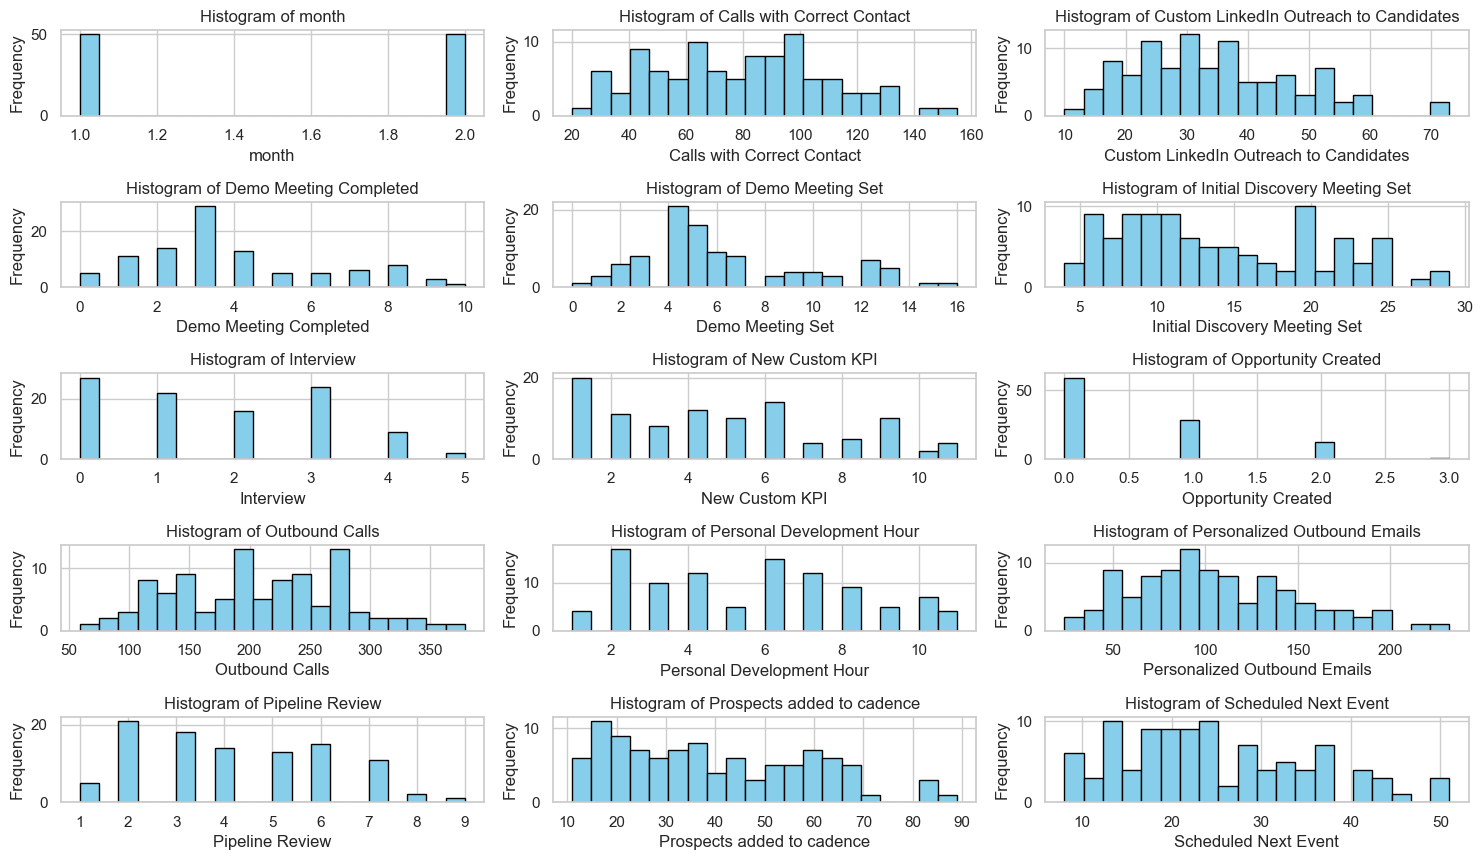

In [1041]:
# plotting distributions to find the shape of columns

# Get numerical columns
numerical_cols = reshaped_df.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure and axis for plotting
plt.figure(figsize=(15, 10))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)  # Arrange histograms in a grid layout
    plt.hist(reshaped_df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


### Data Exploration takeaways

- The dataset contains 50 unique users (reps) and 2 months of data.
- The dataset has no missing values.
-  Opportunity Created is the target variable and is mostly 0, then 1, and rarely 2.
- The numerical columns have different scales, which requires normalization.
- I'm grouping the cols in later analysis in teaching/review/development and see what correlations they have across all reps

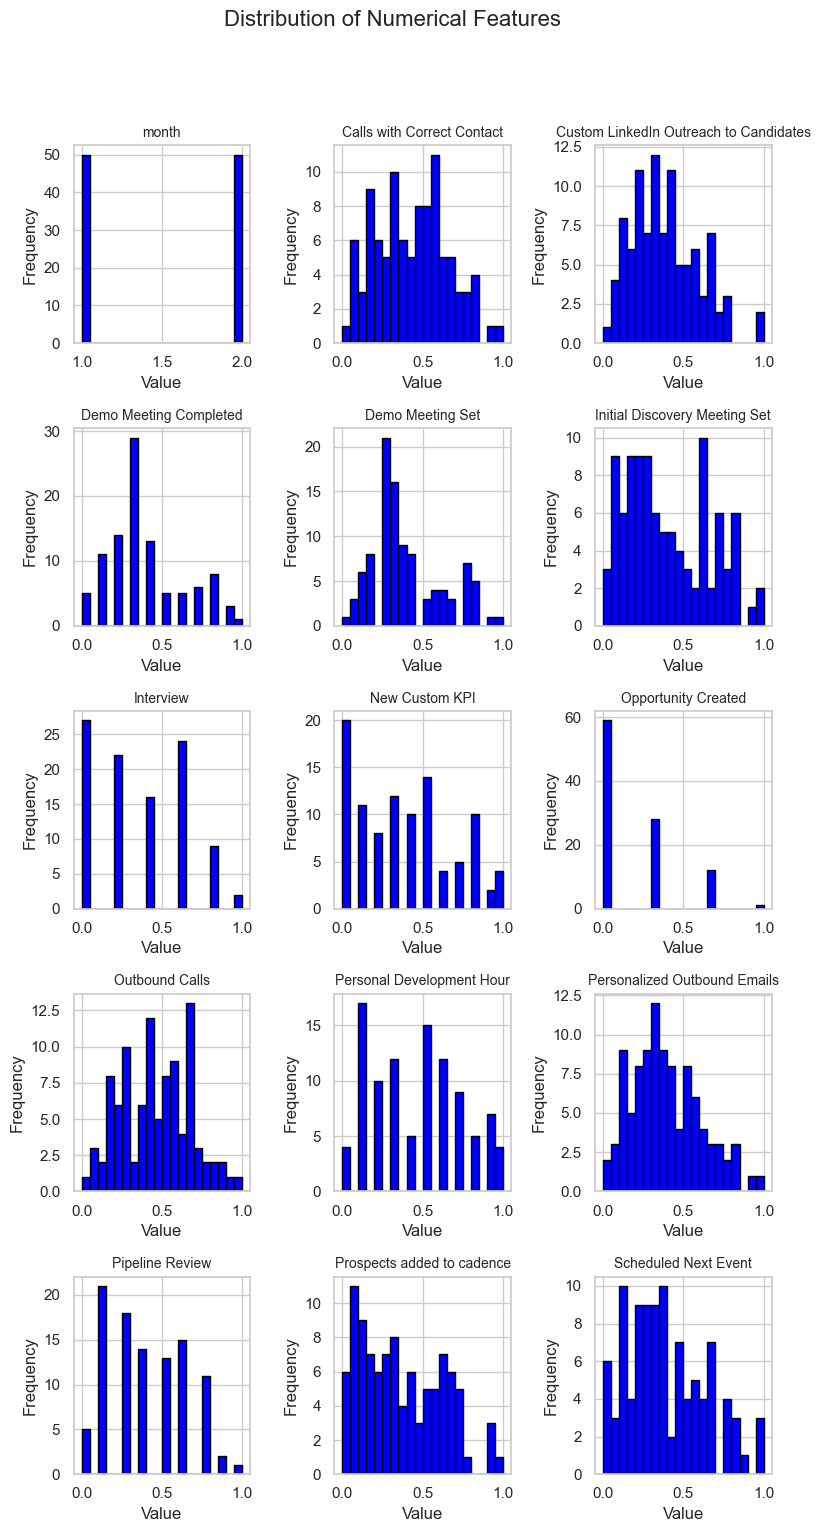

In [1042]:
# Plot the distribution of numerical features after normalization
normalized_df = reshaped_df.copy()
numerical_columns = reshaped_df.select_dtypes(include=['int64', 'float64']).columns

# Exclude 'month' from the numerical columns list
numerical_columns = [col for col in numerical_columns if col != 'month']
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical columns
normalized_df[numerical_columns] = scaler.fit_transform(normalized_df[numerical_columns])

# To de-normalize
denormalized_df = normalized_df.copy()
denormalized_df[numerical_columns] = scaler.inverse_transform(normalized_df[numerical_columns])

# Define the number of columns per row and calculate rows dynamically
cols_per_row = 3
rows = len(numerical_cols) // cols_per_row + (len(numerical_cols) % cols_per_row > 0)

# Create subplots with better aspect ratio
fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(8, rows * 3))  # Increase height per row
axes = axes.flatten()  # Flatten axes for iteration

for i, col in enumerate(numerical_cols):
    normalized_df[col].hist(bins=20, ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add overall title and adjust layout
fig.suptitle("Distribution of Numerical Features", fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout for the title
plt.show()


#### Normalization takeaways

- The numerical columns have been normalized to a range of [0, 1].
- with small dataset, I'm not transforming the data to a normal distribution further e.g. boxcox or log transformations

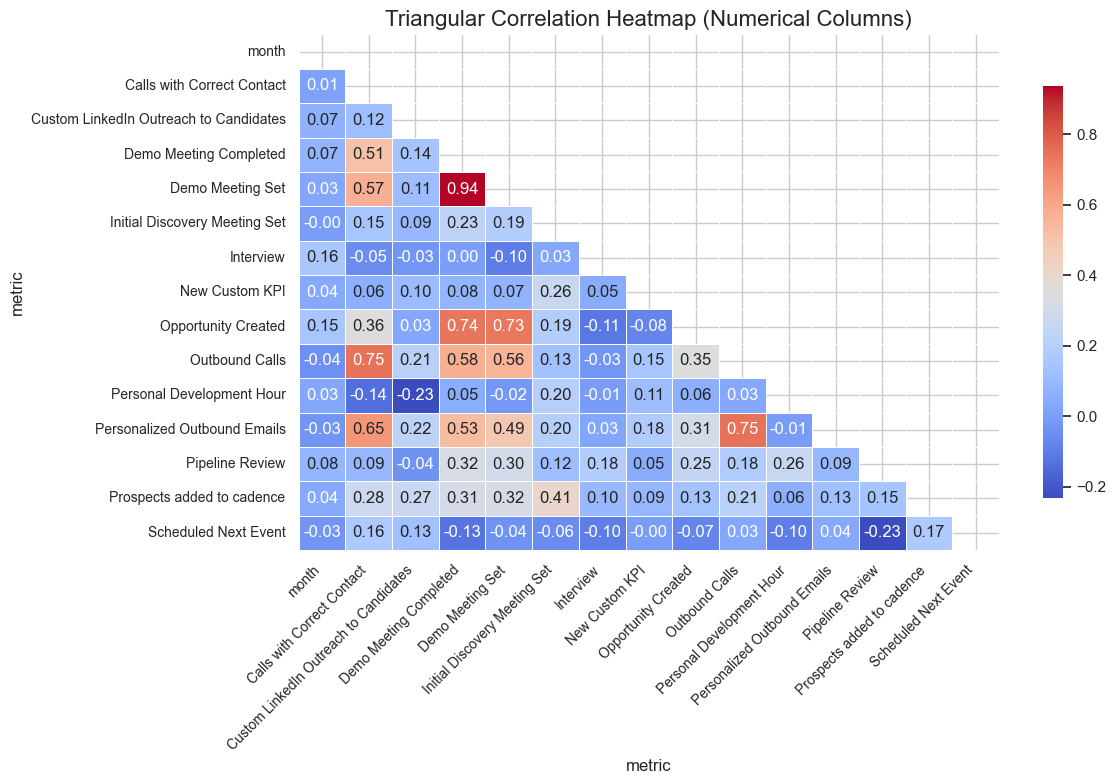

In [1043]:
# Correlation matrix heatmap!

# Select only numerical columns
numerical_cols = normalized_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numerical columns
correlation_matrix = normalized_df[numerical_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap( correlation_matrix,  mask=mask,  cmap='coolwarm',  annot=True, fmt=".2f",linewidths=0.5, cbar_kws={"shrink": 0.8})

# Add title and formatting
plt.title("Triangular Correlation Heatmap (Numerical Columns)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

### Correlation Analysis

- The correlation coefficient ranges from -1 to 1, where:
- -1 indicates a perfect negative correlation.
- 0 indicates no correlation.
- 1 indicates a perfect positive correlation.
- Demo meeting completed is by far the highest corelated

# Modeling

**assumptions**
- Not nearly enough data to individually model a specific rep, so modeling from territory perspective
- Will use a linear regression, random forest, gradient boosting, KNN regressor, and XGBoost regressor to predict the number of opportunities created.
- Column independence is assumed, but check for multicollinearity is needed

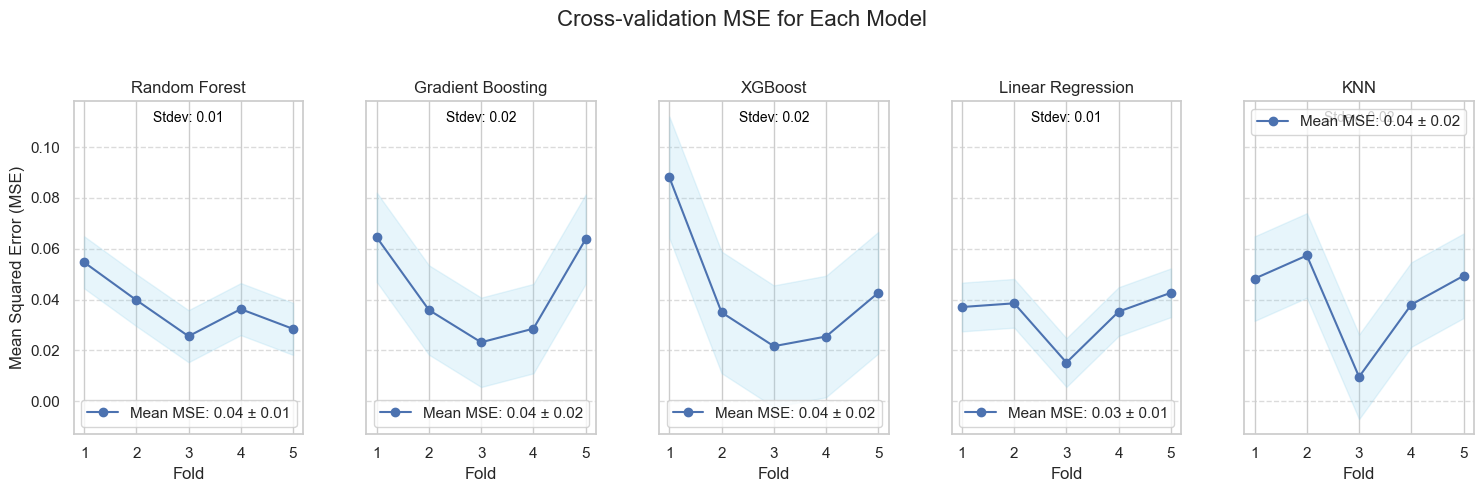

In [1044]:
# List of models to test
# testing lightweight regression models
n_estimators = 5 # 10, 15, 20. # tested multiple, but LR was still the best
models = [
    ('Random Forest', RandomForestRegressor(n_estimators=n_estimators, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=n_estimators, random_state=42)),
    ('XGBoost', xgb.XGBRegressor(n_estimators=n_estimators, random_state=42)),
    ('Linear Regression', LinearRegression()),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
]

# Prepare data
X = normalized_df.drop(['Opportunity Created', 'user_name'], axis=1)
y = normalized_df['Opportunity Created']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation results
cv_results = {}

for name, model in models:
    try:
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # 5-fold CV
        cv_results[name] = -cv_scores  # Negate to get positive MSE for each fold
    except Exception as e:
        print(f"Error with {name}: {e}")

# Create subplots
fig, axes = plt.subplots(1, len(models), figsize=(15, 5), sharey=True)

x_ticks = range(1, 6)  # Fold numbers (1 to 5)

for ax, (name, scores) in zip(axes, cv_results.items()):
    mean_score = scores.mean()
    std_score = scores.std()

    # Plot the scores for each fold
    ax.plot(x_ticks, scores, marker='o', label=f'Mean MSE: {mean_score:.2f} ± {std_score:.2f}')
    ax.fill_between(
        x_ticks, 
        scores - std_score, 
        scores + std_score, 
        color='skyblue', 
        alpha=0.2
    )
    ax.set_title(name)
    ax.set_xlabel('Fold')
    ax.set_xticks(x_ticks)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if ax == axes[0]:  # Add ylabel only to the first subplot
        ax.set_ylabel('Mean Squared Error (MSE)')

    # Add the standard deviation as text on the plot
    ax.text(0.5, 0.95, f'Stdev: {std_score:.2f}', transform=ax.transAxes, ha='center', va='center', fontsize=10, color='black')
    
    ax.legend()

# Adjust layout
fig.suptitle('Cross-validation MSE for Each Model', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the suptitle
plt.show()


### Modeling Results and Takeaways
- Tuned the n_estimators manually from 1-100 and also tuned KNN neighbors

- Looking for lowest Mean Squar Error (MSE) and standard deviation of testing different folds of the dataset

- Good old Linear Regession works best here. Generally works well with small datasets, doesn't overfit as much as other models and has the best explainability of almost any model.

- stdev is good for LR and model is not overfit, and data is limiting factor

### Model interpretabilityAssumption	Key Check	Diagnostic Tool

-further assumption checks:
| **Assumption**             | **Key Check**                      | **Diagnostic Tool**              |
|-----------------------------|-------------------------------------|-----------------------------------|
| Linearity                  | Residual plots                     | Scatter plots or transformations |
| Independence of Errors     | Residual patterns                  | Durbin-Watson test               |
| Homoscedasticity           | Residual variance                  | Residual vs. predicted plots     |
| Normality of Errors        | Residual distribution              | Histogram, Q-Q plot              |
| No Multicollinearity       | Correlation of predictors          | VIF or correlation matrix        |
| No Omitted Variable Bias   | Domain knowledge                   | Feature selection methods        |
#### Feature Importance and Residual Analysis visuals

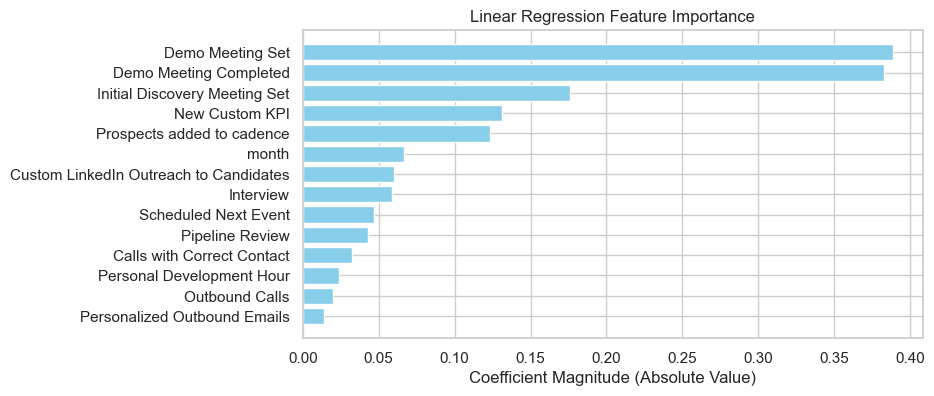

In [1045]:
# Initialize Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Calculate performance (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Get feature importance (absolute value of coefficients)
feature_importances = np.abs(lr_model.coef_)
sorted_idx = feature_importances.argsort()[::-1]  # Reverse the order for descending
sorted_features = X.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Create horizontal bar chart for feature importance
plt.figure(figsize=(8, 4))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.title('Linear Regression Feature Importance')
plt.xlabel('Coefficient Magnitude (Absolute Value)')
plt.gca().invert_yaxis()
plt.show()



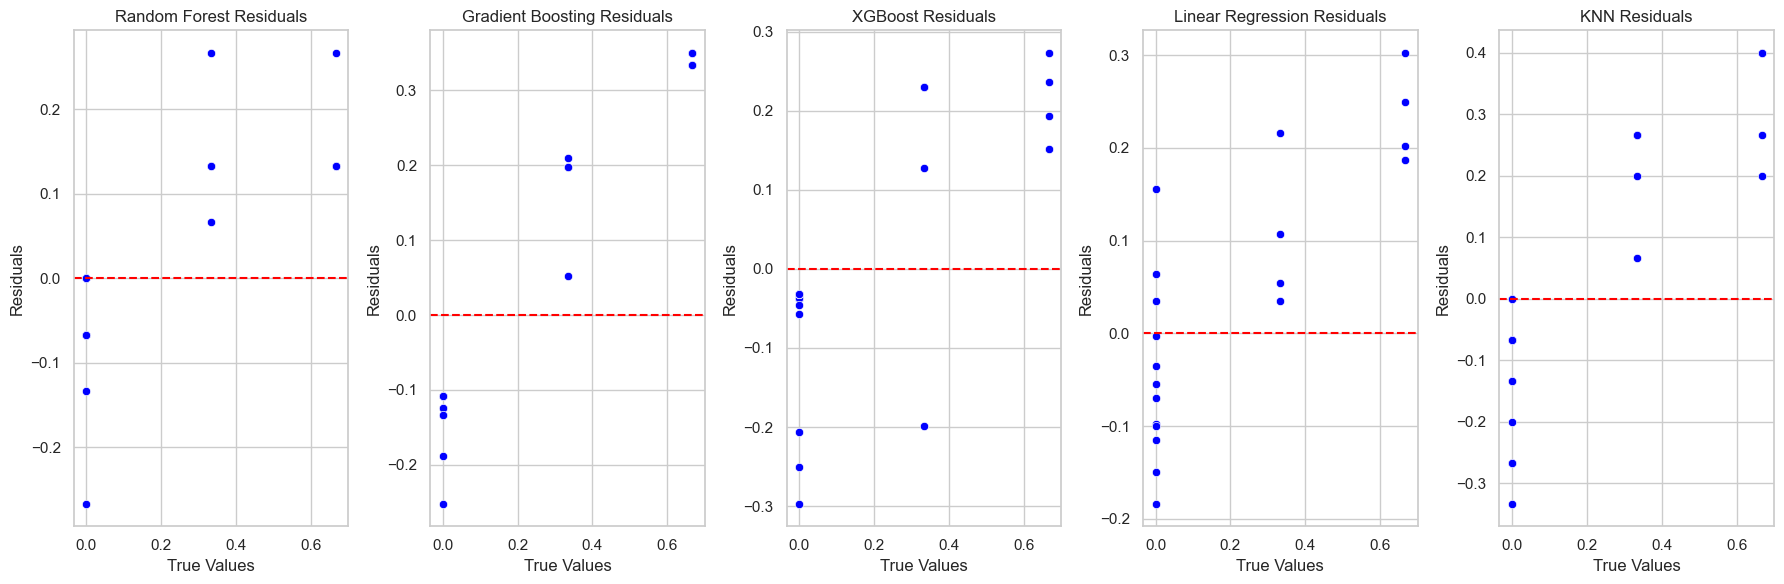

In [1046]:
# Getting the actual meetings seems to be the biggest contributor to the target
#Residual analysis helps to evaluate the model's performance by comparing predicted vs. actual values.

fig, axes = plt.subplots(1, len(models), figsize=(18, 6))

for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    sns.scatterplot(x=y_test, y=residuals, ax=axes[i], color='blue')
    axes[i].axhline(0, color='red', linestyle='--')
    axes[i].set_title(f'{name} Residuals')
    axes[i].set_xlabel('True Values')
    axes[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

####
What we are looking for here is a random display of residuals that are half above and below 0. Not really great for any of the plots

### Predictive Modeling

In [1047]:
def forecast_opportunity_creation_with_user(model, input_dict, scaler):
    """
    Forecast 'Opportunity Created' using an input dictionary and return the forecast
    
    Parameters:
    - model (LinearRegression): The trained Linear Regression model.
    - input_dict (dict): Dictionary of feature names and their numerical values.
    - scaler (MinMaxScaler): The fitted MinMaxScaler used to normalize the entire dataset.
    
    Returns:
    - result (dict): A dictionary containing the forecasted value.
    """
   # Define the complete feature set (should match scaler's feature set during fit)
    feature_columns = scaler.feature_names_in_
    # Create a DataFrame from the input dictionary
    input_df = pd.DataFrame([input_dict])
    
    # Add a placeholder column for 'Opportunity Created'
    input_df['Opportunity Created'] = 0  # Placeholder value
    
    #drop month col
    input_df = input_df.drop(columns=['month'])
    # Ensure the column order matches the scaler's expected order
    input_df = input_df[feature_columns]
    # Normalize the numerical columns (scaler expects all numerical columns)
    input_df[numerical_columns] = scaler.transform(input_df)
    
    # add month back since its not normalized in model and drop target placeholder
    input_df['month'] = input_dict['month']
    input_df = input_df.drop(columns=['Opportunity Created'])
    
    # Prepare the feature values for prediction
    expected_feature_order = model.feature_names_in_  # The feature names from the model
    input_df = input_df[expected_feature_order]       # Reorder input_df to match the model

    feature_values = input_df.values
    predicted_value = model.predict(feature_values)[0]
    
    # De-normalize the predicted value using the scaler for 'Opportunity Created'
    target_column_index = np.where(scaler.feature_names_in_ == 'Opportunity Created')[0][0]
    opportunity_created_min = scaler.data_min_[target_column_index]
    opportunity_created_max = scaler.data_max_[target_column_index]
    forecast_denormalized = predicted_value * (opportunity_created_max - opportunity_created_min)
    
    return forecast_denormalized

input_dict = {
    'month': 3,
    'Calls with Correct Contact': 78,
    'Custom LinkedIn Outreach to Candidates': 34,
    'Demo Meeting Completed': 3,
    'Demo Meeting Set': 6,
    'Initial Discovery Meeting Set': 13,
    'Interview': 1,
    'New Custom KPI': 2,
    'Outbound Calls': 207,
    'Personal Development Hour': 5,
    'Personalized Outbound Emails': 105,
    'Pipeline Review': 3,
    'Prospects added to cadence': 25,
    'Scheduled Next Event': 9
}

# feature dictiona
# Example usage
user_forecast = forecast_opportunity_creation_with_user(lr_model, input_dict, scaler )
print('forecasted created oppoprtunity:', round(user_forecast, 2))

forecasted created oppoprtunity: 0.83


In [1048]:
# Print model coefficients with corresponding feature names
coefficients = lr_model.coef_
feature_names = lr_model.feature_names_in_  # Feature names from the model

# Combine into a dictionary or DataFrame for better readability
feature_coeff_map = dict(zip(feature_names, coefficients))

# Convert to a DataFrame
coeff_df = pd.DataFrame(list(feature_coeff_map.items()), columns=['Feature', 'Coefficient'])

# Sort the DataFrame by 'Coefficient' in descending order
coeff_df_sorted = coeff_df.sort_values(by='Coefficient', ascending=False)

# Display the sorted DataFrame
print(coeff_df_sorted)


                                   Feature  Coefficient
4                         Demo Meeting Set     0.388958
3                   Demo Meeting Completed     0.383157
5            Initial Discovery Meeting Set     0.176136
0                                    month     0.066613
13                    Scheduled Next Event     0.047146
11                         Pipeline Review     0.042996
8                           Outbound Calls     0.019990
10            Personalized Outbound Emails    -0.013697
9                Personal Development Hour    -0.023855
1               Calls with Correct Contact    -0.032294
6                                Interview    -0.058880
2   Custom LinkedIn Outreach to Candidates    -0.059958
12              Prospects added to cadence    -0.123442
7                           New Custom KPI    -0.131353


### Forecasting review
- Forecasting input is maximized allows for more customizable input and flexibility than just the user and month filter!

- Much better for teaching moments and 'what if' scenarios! 


### Continuous improvements for modeling
- Add more data to the dataset

- Iterative process of cleaning, tuning, feature engineering and possible model selection

- Tracking model drift over time with a dashboard

### Identifying at risk performers before it happens

In [1049]:
def identify_at_risk_performers(df, model, feature_columns, month_num=3, percentile=10):
    """
    Identify the X% poor performers based on forecasted 'Opportunity Created' for the next month.
    
    Parameters:
    - data (DataFrame): The dataset containing features and target.
    - model (LinearRegression): The trained model.
    - feature_columns (list): List of feature columns for the forecast.
    - percentile (int): Percentage to identify the poor performers (e.g., 20 for bottom 20%).
    
    Returns:
    - poor_performers (DataFrame): DataFrame containing the users in the bottom X% based on forecast.
    """
    # Prepare feature data for prediction (using the same features for each user)
    x_users = df[feature_columns]
    x_users['month'] = month_num # getting for next month
    #     
    # Predict the Opportunity Created value for each user
    forecasted_values = model.predict(x_users)
    # print('forecasted values', forecasted_values)
    # Add forecasted values to the user data
    df['forecast'] = forecasted_values
    df['forecast_opp_diff'] =  df['forecast'] - df['Opportunity Created'] 
    at_risk_users = df[df['forecast_opp_diff'] < 0]
    
    # Calculate the threshold for the bottom X% performers
    threshold = np.percentile(at_risk_users['forecast'], percentile)
    
    # Select users who have a forecasted value lower than the threshold and the month is 2

    at_risk_users = at_risk_users[at_risk_users['month'] == 2]
    at_risk_users = at_risk_users[at_risk_users['forecast'] <= threshold]
    
    # print(at_risk_users.info())
    return at_risk_users.sort_values(by='forecast_opp_diff', ascending=True)

# Example usage
# Assume 'normalized_df' is the dataset with feature data and model is already trained
feature_columns = ['month', 'Calls with Correct Contact', 'Custom LinkedIn Outreach to Candidates', 
                   'Demo Meeting Completed', 'Demo Meeting Set', 'Initial Discovery Meeting Set', 
                   'Interview', 'New Custom KPI', 'Outbound Calls', 'Personal Development Hour', 
                   'Personalized Outbound Emails', 'Pipeline Review', 'Prospects added to cadence', 
                   'Scheduled Next Event']

at_risk_users = identify_at_risk_performers(normalized_df, lr_model, feature_columns, month_num=3, percentile=30)

# Display the poor performers
print(at_risk_users[['user_name', 'forecast', 'Opportunity Created', 'forecast_opp_diff']])
# print(at_risk_users)


metric        user_name  forecast  Opportunity Created  forecast_opp_diff
76         Rachel Cohen  0.184111             0.333333          -0.149222
82           Samuel Kim  0.200613             0.333333          -0.132721
36      James Rodriguez  0.229542             0.333333          -0.103791
66      Michael O'Brien -0.008259             0.000000          -0.008259


### Identifying at-risk performers takeaways
- Can be used to identify reps who may need additional support or training

- Can be used for reps that have been good previously, but having a downward trend

- model flexibility allows to select over entire range or X percentile. For ex: lowest 30% of performers

- Allows analysis to prevent churn or loss of revenue and get training before performance slippage occurs

# Time Series analysis

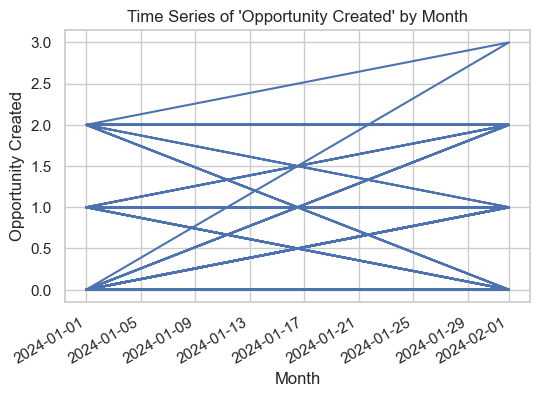

In [1050]:
# Preprocess the data
time_df = reshaped_df.copy()
# Create a new 'month' column in datetime format
time_df['month'] = pd.to_datetime(time_df['month'].astype(str) + '-2024', format='%m-%Y')

# Verify the changes
time_df['month'] = pd.to_datetime(time_df['month'])  # Ensure 'month' column is in datetime format
time_df.set_index('month', inplace=True)
target = 'Opportunity Created'

# Visualize the time series
time_df[target].plot(figsize=(6, 4), title=f"Time Series of '{target}' by Month")
plt.xlabel('Month')
plt.ylabel(target)
plt.show()

# Based on the ACF and PACF plots, we select the order for the ARIMA model.
# For example, p=1, d=1, q=1 based on ACF/PACF plots (you may need to adjust based on actual data)
model = ARIMA(time_df[target], order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Forecast the next 12 months (you can adjust the number of forecast steps)
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

### Time Series Analysis Takeaways
- ARIMA model (or any other time series models) won't work with two datetime data points!

How I **would** approach this with enough data:

- Use the ARIMA model to forecast the number of opportunities created for the next 12 months.

- Create ACF and PACF plots to determine initial p, d, q values

- Evaluate the model's performance using metrics like Mean Squared Error (MSE) and tune final p,d,q values.

- Visualize the forecasted values against the historical data to understand trends.

- create confidence intervals on chart and identify anomalies and threshold


#### Anomaly Detection example

In [1051]:
# detecting anomalies example from time series

anomaly_test = time_df['Opportunity Created']

# Calculate the z-score
time_df['z_score'] = zscore(anomaly_test)

# Define an anomaly as a value beyond a certain threshold
anomalies = time_df[time_df['z_score'].abs() > 2]  # Z-score threshold of 2
print(anomalies)


metric     user_name  Calls with Correct Contact  \
month                                              
2024-02-01  Zara Ali                       132.0   

metric      Custom LinkedIn Outreach to Candidates  Demo Meeting Completed  \
month                                                                        
2024-02-01                                    52.0                     8.0   

metric      Demo Meeting Set  Initial Discovery Meeting Set  Interview  \
month                                                                    
2024-02-01              12.0                           21.0        0.0   

metric      New Custom KPI  Opportunity Created  Outbound Calls  \
month                                                             
2024-02-01             4.0                  3.0           268.0   

metric      Personal Development Hour  Personalized Outbound Emails  \
month                                                                 
2024-02-01                        7.0    

# Business Recommendations
- Mainly focused on conversion rates and improving that during training, but other examples are:

- ROI analysis of recommendations

- implementaion priorities for sales reps
- calls vs emails effectiveness

- who is being trained with no success?

- what is hardest stage to train?

- who is best at what stage?


In [1052]:
# normalized_df.columns 
''''user_name', 'month', 'Calls with Correct Contact',
       'Custom LinkedIn Outreach to Candidates', 'Demo Meeting Completed',
       'Demo Meeting Set', 'Initial Discovery Meeting Set', 'Interview',
       'New Custom KPI', 'Opportunity Created', 'Outbound Calls',
       'Personal Development Hour', 'Personalized Outbound Emails',
       'Pipeline Review', 'Prospects added to cadence',
       'Scheduled Next Event'''



#Teaching: 1:1,  personal development hour, pipeline review, new custom KPI,  interview?

"'user_name', 'month', 'Calls with Correct Contact',\n       'Custom LinkedIn Outreach to Candidates', 'Demo Meeting Completed',\n       'Demo Meeting Set', 'Initial Discovery Meeting Set', 'Interview',\n       'New Custom KPI', 'Opportunity Created', 'Outbound Calls',\n       'Personal Development Hour', 'Personalized Outbound Emails',\n       'Pipeline Review', 'Prospects added to cadence',\n       'Scheduled Next Event"

#### Conversion Rate Analysis for sales pipeline stages
**Assuming pipeline stages that I built the sankey diagram below

In [1053]:
# Add in conversion rate cols:

df_conv_rt = reshaped_df.copy() # non normalized

# Add the new column 'opening_rt'
df_conv_rt['opening_rt'] = df_conv_rt['Calls with Correct Contact'] / ( df_conv_rt['Custom LinkedIn Outreach to Candidates'] +  df_conv_rt['Personalized Outbound Emails'] +  df_conv_rt['Outbound Calls'] +  df_conv_rt['Prospects added to cadence']
).fillna(0)  # Handle potential division by zero

# correct contact to discovery meeting
df_conv_rt['intro_to_call_rt'] = (df_conv_rt['Initial Discovery Meeting Set'] / df_conv_rt['Calls with Correct Contact']).fillna(0)  #

# discovery meeting to demo meeting set
df_conv_rt['call_to_disc_rt'] = (  df_conv_rt['Demo Meeting Set'] / df_conv_rt['Initial Discovery Meeting Set']).fillna(0)  # 
# outliers! needed to cap at 1 due to rollover
df_conv_rt['call_to_disc_rt'] = df_conv_rt['call_to_disc_rt'].clip(upper=1)

# Did they attend the demo meeting?
df_conv_rt['demo_completed_rt'] = (df_conv_rt['Demo Meeting Completed'] / df_conv_rt['Demo Meeting Set']).fillna(0)  #

# demo to opportunity listed
df_conv_rt['demo_to_opp_rt'] = (df_conv_rt['Opportunity Created'] / df_conv_rt['Demo Meeting Completed']).fillna(0)  # 

df_conv_rt.head()
df_conv_rt.to_csv('df_conv_rt.csv', index=False) # exploration

#df_conv_rt['opening_rt'] , 'intro_to_call_rt', 'call_to_disc_rt', 'demo_completed_rt', 'demo_to_opp_rt'
# violin plots
# df_conv_rt

metric,user_name,month,Calls with Correct Contact,Custom LinkedIn Outreach to Candidates,Demo Meeting Completed,Demo Meeting Set,Initial Discovery Meeting Set,Interview,New Custom KPI,Opportunity Created,...,Personal Development Hour,Personalized Outbound Emails,Pipeline Review,Prospects added to cadence,Scheduled Next Event,opening_rt,intro_to_call_rt,call_to_disc_rt,demo_completed_rt,demo_to_opp_rt
0,Adam Cohen,2,71.0,40.0,3.0,5.0,11.0,4.0,2.0,0.0,...,8.0,139.0,6.0,63.0,24.0,0.150106,0.154930,0.454545,0.600000,0.000000
1,Adam Cohen,1,88.0,50.0,3.0,4.0,12.0,3.0,1.0,0.0,...,7.0,153.0,6.0,53.0,29.0,0.166352,0.136364,0.333333,0.750000,0.000000
2,Aisha Khan,2,49.0,34.0,3.0,5.0,9.0,4.0,6.0,0.0,...,6.0,70.0,4.0,38.0,19.0,0.175000,0.183673,0.555556,0.600000,0.000000
3,Aisha Khan,1,46.0,35.0,3.0,4.0,7.0,4.0,6.0,0.0,...,7.0,63.0,3.0,34.0,24.0,0.172932,0.152174,0.571429,0.750000,0.000000
4,Alex Johnson,2,80.0,18.0,7.0,10.0,8.0,2.0,5.0,2.0,...,8.0,97.0,7.0,18.0,10.0,0.233918,0.100000,1.000000,0.700000,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Victoria Wu,1,108.0,29.0,2.0,4.0,11.0,0.0,1.0,0.0,...,3.0,130.0,2.0,15.0,33.0,0.321429,0.101852,0.363636,0.500000,0.000000
96,William Brown,2,43.0,14.0,1.0,3.0,10.0,1.0,2.0,0.0,...,5.0,56.0,1.0,11.0,9.0,0.210784,0.232558,0.300000,0.333333,0.000000
97,William Brown,1,52.0,19.0,3.0,3.0,16.0,3.0,2.0,0.0,...,10.0,70.0,1.0,15.0,14.0,0.149856,0.307692,0.187500,1.000000,0.000000
98,Zara Ali,2,132.0,52.0,8.0,12.0,21.0,0.0,4.0,3.0,...,7.0,165.0,6.0,69.0,36.0,0.238267,0.159091,0.571429,0.666667,0.375000


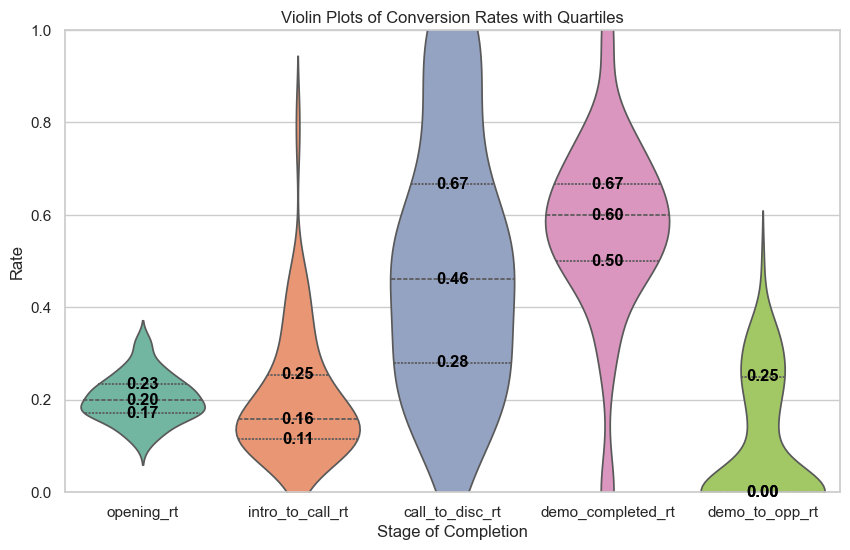

In [1056]:
# Define rate columns
rate_columns = ['opening_rt', 'intro_to_call_rt', 'call_to_disc_rt', 'demo_completed_rt', 'demo_to_opp_rt']

# Set up the figure and axis for plotting
plt.figure(figsize=(10, 6))

# Create the violin plots with quartiles shown
sns.violinplot(data=df_conv_rt[rate_columns], inner="quart", scale='width', palette="Set2")

# Set the y-axis limits to be between 0 and 1
plt.ylim(0, 1)

# Add quartile annotations
for i, col in enumerate(rate_columns):
    # Get the quartile values for each column
    quartiles = np.percentile(df_conv_rt[col].dropna(), [25, 50, 75])  # 25th, 50th, 75th percentiles
    for q, quartile in zip([25, 50, 75], quartiles):
        # Annotate the quartile value on the plot
        plt.text(i, quartile, f'{quartile:.2f}', horizontalalignment='center', verticalalignment='center', color='black', fontweight='bold')

# Title and labels
plt.title("Violin Plots of Conversion Rates with Quartiles")
plt.xlabel("Stage of Completion")
plt.ylabel("Rate")

# Show the plot
plt.show()

#### Conversion Rate Analysis Takeaways

- Lower values mean lower conversion rates, thus bigger bottleneck in pipeline

- Violins with highest variance (stretched out distribution) have more ability for training and improvement  

- Opening rates are generally low for all users and similar across the board. Probably the least time training should be spent here  

- The call to discovery conversion rate is very wide. Most likely due to having only 2 data points. If it were a true 30-day rolling average, it would greatly improve the data quality.  

- Top performers are doing very well in the intro call to discovery call. This is where the most training should be spent  

- There are some outliers in the demo completed conversion rate, and those low performers need to be identified and trained.  

- The Demo to Opportunity rate is artificially low due to a good portion of reps not closing an opportunity. But this is still a good metric to train on because of its importance and correlation to the target of opportunity created.  


### Sales Pipeline Visualization

In [1063]:
# Create a Sankey diagram for the sales pipeline
def create_sankey(df, user_name=None, month=None):
    """
    Generate a Sankey diagram based on a filtered dataset.
    
    Args:
        df (pd.DataFrame): The input DataFrame with the pipeline data.
        user_name (str, optional): User name to filter by. Defaults to None (no filtering).
        month (int, optional): Month to filter by. Defaults to None (no filtering).
    """
    # Filter the data
    if user_name:
        df = df[df['user_name'] == user_name]
    if month:
        df = df[df['month'] == month]

    # Define stages explicitly
    pipeline = [
        'Custom LinkedIn Outreach to Candidates',
        'Personalized Outbound Emails',
        'Outbound Calls',
        'Calls with Correct Contact',
        'Initial Discovery Meeting Set',
        'Demo Meeting Set',
        'Demo Meeting Completed',
        'Opportunity Created'
    ]

    # Create links for the first three sources feeding into "Calls with Correct Contact"
    links = []
    sources = [
        'Custom LinkedIn Outreach to Candidates',
        'Personalized Outbound Emails',
        'Outbound Calls'
    ]
    target = 'Calls with Correct Contact'

    for source in sources:
        total_flow = df[source].sum()
        links.append({'source': source, 'target': target, 'value': total_flow})

    # Add links for the rest of the pipeline
    for i in range(3, len(pipeline) - 1):
        source = pipeline[i]
        target = pipeline[i + 1]
        total_flow = df[[source, target]].sum().min()
        links.append({'source': source, 'target': target, 'value': total_flow})

    # Prepare Sankey data
    links_df = pd.DataFrame(links)

    # Unique stages
    all_stages = list(set(links_df['source'].unique()).union(set(links_df['target'].unique())))
    stage_indices = {stage: i for i, stage in enumerate(all_stages)}

    sankey_data = {
        'source': links_df['source'].map(stage_indices).tolist(),
        'target': links_df['target'].map(stage_indices).tolist(),
        'value': links_df['value'].tolist(),
        'labels': all_stages,
    }

    # Build the Sankey chart
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            label=sankey_data['labels'],
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5)
        ),
        link=dict(
            source=sankey_data['source'],
            target=sankey_data['target'],
            value=sankey_data['value']
        )
    )])

    fig.update_layout(
        title=f"Sankey Diagram for Sales Pipeline {' - ' + user_name if user_name else ''} {' - Month ' + str(month) if month else ''}",
        font=dict(size=8)
    )

    fig.show()

# Example usage
create_sankey(reshaped_df, user_name= 'Hannah Park', month=2) #Benjamin Lee 'Zara Ali'

 # 'Thomas Nguyen' 'Lisa Park' 'John Smith' 'Maria Garcia' 'Alex Johnson'
 # 'Sophie Martin' 'Carlos Lopez' 'Diana Lee' 'Ryan Taylor' 'Nina Williams'
 # 'Omar Hassan' 'Isabella Silva' 'Raj Patel' 'Anna Kowalski' 'Daniel Lee'
 # 'Fatima Ahmed' 'Sean Murphy' 'Elena Santos' 'Kevin Zhang' 'Maya Patel'
 # 'William Brown' 'Sophia Chen' 'Lucas Ferreira' 'Zara Ali'
 # 'Gabriel Torres' 'Julia Kim' 'Adam Cohen' 'Leah Thompson' 'Marco Rossi'
 # 'Hannah Park' 'Andre Silva' 'Lily Chen' 'Mateo Garcia' 'Ava Williams'
 # 'Samuel Kim' 'Mia Rodriguez' 'Nathan Singh' 'Laura Martinez'
 # 'Benjamin Lee' 'Victoria Wu' 'Christopher Davis



#### Takeways from sales pipeline
- Can be used to identify bottlenecks in the pipeline

- Flexible diagram that can be filtered by user or month


#### ROI Calculation for training improvements in conversion rate

In [1058]:
# ROI Calculation is a arbitrary metric, but could be replaced with real-time metrics like time or money

# 1. Calculate the average daily activity (based on historical data)
activity_columns = [
    'Calls with Correct Contact', 'Custom LinkedIn Outreach to Candidates',
    'Demo Meeting Completed', 'Demo Meeting Set', 'Initial Discovery Meeting Set',
    'Interview', 'Opportunity Created', 'Outbound Calls',
    'Personal Development Hour', 'Personalized Outbound Emails', 'Pipeline Review', 
    'opening_rt', 'intro_to_call_rt', 'call_to_disc_rt', 'demo_completed_rt', 'demo_to_opp_rt'
]

# Calculate overall averages for the activity columns
activity_averages = df_conv_rt[activity_columns].mean()
activity_averages_sorted = activity_averages.sort_values(ascending=False)

# Print the sorted averages
# print("Activity Averages (Descending):\n", activity_averages_sorted)


opening_rt_avg = activity_averages['opening_rt']
intro_call_rt_avg = activity_averages['intro_to_call_rt']
call_to_disc_rt_avg = activity_averages['call_to_disc_rt']
demo_completed_rt_avg = activity_averages['demo_completed_rt']
demo_to_opp_rt_avg = activity_averages['demo_to_opp_rt']

df_conv_rt['ROI'] = ((df_conv_rt['Outbound Calls'] + df_conv_rt['Personalized Outbound Emails'] + df_conv_rt['Custom LinkedIn Outreach to Candidates']) * opening_rt_avg + 
                     df_conv_rt['Calls with Correct Contact'] * intro_call_rt_avg
                     + df_conv_rt['Initial Discovery Meeting Set'] * call_to_disc_rt_avg +
                     df_conv_rt['Demo Meeting Set'] * demo_completed_rt_avg +
                     df_conv_rt['Demo Meeting Completed'] * demo_completed_rt_avg + 
                     df_conv_rt['Opportunity Created'] * demo_to_opp_rt_avg) 

# Calculate average ROI by user
ranked_users = df_conv_rt.groupby('user_name')['ROI'].mean().sort_values(ascending=False).reset_index(name='ROI')

# Get low ROI users for coaching
roi_percent = 15
low_roi_users = ranked_users.tail(roi_percent)  # Adjust the number based on requirements
top_roi_users = ranked_users.head(roi_percent)  # Adjust the number based on requirements

print("Top ROI users:\n", top_roi_users)
print("Low ROI users:\n", low_roi_users)


Top ROI users:
             user_name         ROI
0   Christopher Davis  162.545582
1       Mia Rodriguez  152.159177
2         Sean Murphy  145.135417
3          Samuel Kim  142.176962
4         Andre Silva  140.627731
5            Zara Ali  134.759091
6       Thomas Nguyen  130.909865
7        Fatima Ahmed  127.108576
8          Daniel Lee  127.007064
9         Ryan Taylor  121.506452
10       Benjamin Lee  117.284441
11          Raj Patel  117.209182
12          David Kim  117.168104
13         Adam Cohen  116.218131
14         John Smith  115.290763
Low ROI users:
           user_name        ROI
35     Ava Williams  78.896489
36      Sarah Patel  78.097471
37     Carlos Lopez  77.269375
38   Laura Martinez  76.954407
39     Rachel Cohen  75.046679
40    Sophie Martin  74.555189
41    William Brown  72.317124
42        Lisa Park  67.768190
43       Aisha Khan  66.103067
44        Julia Kim  64.664980
45   Gabriel Torres  58.010857
46   Lucas Ferreira  57.525630
47      Kevin Zhang  

In [1059]:
# 3. Recommend daily activity targets based on top ROI performers
# Calculate average activity levels for top ROI users
top_user_names = top_roi_users['user_name']
top_users_activity = df_conv_rt[df_conv_rt['user_name'].isin(top_user_names)][activity_columns].mean()

# Calculate average activity levels for low ROI users
bottom_user_names = low_roi_users['user_name']
bottom_users_activity = df_conv_rt[df_conv_rt['user_name'].isin(bottom_user_names)][activity_columns].mean()

# Calculate the difference in activity between top and low ROI users
activity_diff = top_users_activity - bottom_users_activity

# Sort the activity differences in descending order
activity_diff_sorted = activity_diff.sort_values(ascending=False)

# Display the sorted activity differences
print("\nActivity Difference (Top ROI - Low ROI) sorted:\n", activity_diff_sorted)


Activity Difference (Top ROI - Low ROI) sorted:
 metric
Outbound Calls                            134.200000
Personalized Outbound Emails               87.033333
Calls with Correct Contact                 55.666667
Custom LinkedIn Outreach to Candidates      9.966667
Demo Meeting Set                            5.933333
Demo Meeting Completed                      4.000000
Initial Discovery Meeting Set               2.800000
Opportunity Created                         0.866667
Pipeline Review                             0.833333
call_to_disc_rt                             0.286337
demo_completed_rt                           0.174311
demo_to_opp_rt                              0.114841
opening_rt                                  0.024819
intro_to_call_rt                           -0.140533
Interview                                  -0.200000
Personal Development Hour                  -1.033333
dtype: float64


In [1060]:
# 3. Recommend daily activity targets based on top ROI performers
# Calculate average activity levels for top ROI users
top_user_names = top_roi_users['user_name']
top_users_activity = df_conv_rt[df_conv_rt['user_name'].isin(top_user_names)][activity_columns].mean()

# Create daily activity recommendations
recommendations = pd.DataFrame(columns=['activity', 'recommendation'])

# Round the values and assign them to the recommendations DataFrame
recommendations['activity'] = activity_columns
recommendations['recommendation'] = np.round(top_users_activity.values, 1)

# Sort the recommendations DataFrame in descending order by 'recommendation'
recommendations = recommendations.sort_values(by='recommendation', ascending=False)

# Display the sorted recommendations DataFrame
print("\nRecommended Daily Activity Targets (Sorted):\n", recommendations)



Recommended Daily Activity Targets (Sorted):
                                   activity  recommendation
7                           Outbound Calls           269.7
9             Personalized Outbound Emails           150.9
0               Calls with Correct Contact           103.8
1   Custom LinkedIn Outreach to Candidates            38.9
4            Initial Discovery Meeting Set            15.8
3                         Demo Meeting Set             9.3
2                   Demo Meeting Completed             5.8
8                Personal Development Hour             5.5
10                         Pipeline Review             4.9
5                                Interview             1.6
6                      Opportunity Created             1.0
13                         call_to_disc_rt             0.6
14                       demo_completed_rt             0.6
11                              opening_rt             0.2
12                        intro_to_call_rt             0.2
15       

#### Simulating an increase in conversion rate efficiency in the sales pipeline

In [1061]:
# Update conversion rates for users with zero rates to the first quartile value
df_conv_rt.loc[df_conv_rt['opening_rt'] == 0, 'opening_rt'] = 0.17
df_conv_rt.loc[df_conv_rt['intro_to_call_rt'] == 0, 'intro_to_call_rt'] = 0.11
df_conv_rt.loc[df_conv_rt['call_to_disc_rt'] == 0, 'call_to_disc_rt'] = 0.25
df_conv_rt.loc[df_conv_rt['demo_completed_rt'] == 0, 'demo_completed_rt'] = 0.50
df_conv_rt.loc[df_conv_rt['demo_to_opp_rt'] == 0, 'demo_to_opp_rt'] = 0.125

# Simulated ROI calculation
df_conv_rt['simulated_ROI'] = ((df_conv_rt['Outbound Calls'] + df_conv_rt['Personalized Outbound Emails'] + df_conv_rt['Custom LinkedIn Outreach to Candidates']) * opening_rt_avg + 
                     df_conv_rt['Calls with Correct Contact'] * intro_call_rt_avg *  
                     + df_conv_rt['Initial Discovery Meeting Set'] * call_to_disc_rt_avg +
                     df_conv_rt['Demo Meeting Set'] * demo_completed_rt_avg +
                     df_conv_rt['Demo Meeting Completed'] * demo_completed_rt_avg + 
                     df_conv_rt['Opportunity Created'] * demo_to_opp_rt_avg) 

# Calculate and compare simulated ROI for low ROI users
low_roi_users_simulated = df_conv_rt[df_conv_rt['user_name'].isin(low_roi_users['user_name'])]

# Aggregate original and simulated ROI for comparison
comparison = low_roi_users_simulated.groupby('user_name').agg(
    Original_ROI=('ROI', 'mean'),
    Simulated_ROI=('simulated_ROI', 'mean')
).reset_index()

# Display comparison
print("\nComparison of Original and Simulated ROI for Low ROI Users:\n", comparison)
print('\n * note, conversion rates is not a confirmed relationship in the data, so this is a simulated example without created opportunities')


Comparison of Original and Simulated ROI for Low ROI Users:
           user_name  Original_ROI  Simulated_ROI
0        Aisha Khan     66.103067      91.307669
1      Ava Williams     78.896489     174.854607
2      Carlos Lopez     77.269375     148.564522
3    Gabriel Torres     58.010857      67.499562
4         Julia Kim     64.664980      97.479904
5       Kevin Zhang     52.883209      86.570866
6    Laura Martinez     76.954407     152.380306
7         Lily Chen     43.534448      64.351161
8         Lisa Park     67.768190     111.291716
9    Lucas Ferreira     57.525630     116.575686
10  Michael O'Brien     40.580888      50.209745
11     Rachel Cohen     75.046679     100.567098
12      Sarah Patel     78.097471     200.958860
13    Sophie Martin     74.555189     128.280988
14    William Brown     72.317124     120.549645

 * note, conversion rates is not a confirmed relationship in the data, so this is a simulated example without created opportunities


### Conclusion and Recommendations

1. **Key Insights from Limited Data**
   - Even with only two months of data, there are many insights that can be gained.
      - The dataset was balanced with no missing values and limited outliers.
      - **Top coefficients:**

        | Feature                        | Coefficient |
        |--------------------------------|-------------|
        | Demo Meeting Set               | 0.388958    |
        | Demo Meeting Completed         | 0.383157    |
        | Initial Discovery Meeting Set  | 0.176136    |

      - **Bottom coefficients:**

        | Feature                           | Coefficient |
        |-----------------------------------|-------------|
        | Interview                         | -0.058880   |
        | Custom LinkedIn Outreach to Candidates | -0.059958   |
        | Prospects added to cadence        | -0.123442   |
        | New Custom KPI                    | -0.131353   |


      - Top and low performers can be identified, and the biggest differences between reps started at the top of the pipeline.
      - Conversion rates can be trained for low performers.  
      - More granular models could be made, such as a model for a region or division, with more data.
      - Had a few assumptions with the sales pipeline and needed clarity on the 'interview', 'next meeting', etc columns.

2. **Modeling Considerations**
   - The small dataset leans towards a simple linear regression model with excellent explainability.
      - Tradeoff: Simplicity in model choice vs. explainability and interpretability.
   - Modeling is an ever-evolving process and can be iterated upon with feature engineering, hyperparameter tuning, and more advanced models.
      - **Feature engineering recommendations**: Adding conversion rates, rolling averages, and more user-specific data to train.
      - **Hyperparameter tuning**: `n_estimators`, `n_neighbors`, and other model-specific hyperparameters.
      - Further testing of linear regression assumptions stated above.

3. **Data Quality Recommendations for Further Analysis**
   - No time series model could be performed due to lack of data, and sales is definitely seasonal.
   - Recommendation: Obtain customer data for improving the model's predictive power.
   - Many more insights and metrics can be obtained even with this small dataset.
      - Didn't have time to do a more detailed analysis on certain columns such as 'interview', 'next event', and 'prospects added to cadence'.

4. **Future AI Applications**
   - Gathering customer data vs. email and LinkedIn opening messages could be analyzed and automated with foundational LLM models.
      - Phone calls could also be analyzed (where recording is legal) and improved upon.
      - Meta's LLama is open-source and free, compared to OpenAI's API costs.
   - Automate sales tracking processes with AI agents.
   - Summarize meetings and action items.
   - Finding the decision maker patterns in an organization
   - Recommendation: Obtain customer data for improving the model's predictive power. 
